In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 【問題1】練習のために特徴量の選択

In [2]:
data = pd.read_csv('train.csv')

In [3]:
train_x = data[['GrLivArea', 'YearBuilt']]
train_x

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


In [4]:
train_y = data['SalePrice']
train_y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 【問題2】線形回帰による推定と評価

In [5]:
train_x.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

In [6]:
train_x.describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1dd5fbaf9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd5fbbafc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd5fbb4588>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd5fbbdf88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd5fbc3988>],
 'means': []}

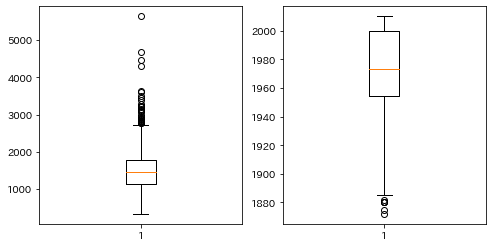

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot(train_x['GrLivArea'])
ax[1].boxplot(train_x['YearBuilt'])

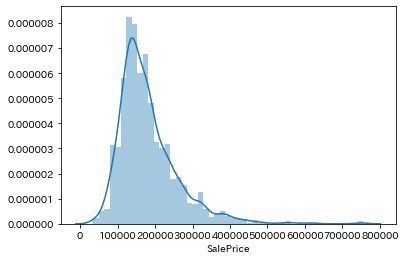

In [8]:
sns.distplot(train_y)

In [9]:
train_y = np.log(train_y)

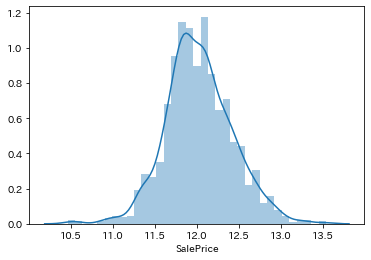

In [10]:
sns.distplot(train_y)

In [11]:
data.corr().loc[['GrLivArea','YearBuilt','SalePrice'], ['GrLivArea','YearBuilt','SalePrice']]

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


## 欠損値はない。どちらも分布が偏っているため、標準化して用いる。

In [12]:
tr_x, va_x, tr_y, va_y = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(tr_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
tr_x = scaler.transform(tr_x)

In [16]:
va_x = scaler.transform(va_x)

In [17]:
def evaluation(tr_x, tr_y, va_x, va_y, model):
    """
    Accuracy, Precision, Recall, F値を計算する 

    Parameters
    ----------------
    tr_x : ndarray, shape(n_samples, 2)
          train_data 特徴量
    tr_y : ndarray, shape(n_samples,)
          train_data 価格
    va_x : ndarray, shape(n_samples, 2)
          validationdata 特徴量
    va_y : ndarray, shape(n_samples,)
          validation_data 価格     
    model : object
        学習したモデルのインスンタスを入れる
    """
    model.fit(tr_x, tr_y)
    y_pred = model.predict(va_x)
    mse = mean_squared_error(np.exp(va_y), np.exp(y_pred))
    mae = mean_absolute_error(np.exp(va_y), np.exp(y_pred))
    r2 = r2_score(np.exp(va_y), np.exp(y_pred))
    return mse, mae, r2

In [18]:
def drawing_graph(x, y, model, title, xlabel_1='GrLivArea', xlabel_2='YearBuilt',ylabel='SalePrice'):
    """
    学習させたグラフを描写する 

    Parameters
    ----------------
    x : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        価格     
    model : object
        学習したモデルのインスンタスを入れる
    title : str
        グラフのタイトルの文章を与える
    xlabel_1, x_label_2, ylabel : str
        軸ラベルの文章を与える
    """
    fig, ax = plt.subplots(1, 2 , figsize=(12, 4))
    y_pred = model.predict(x)
    ax[0].scatter(x[:,0], y_pred,label='pred', alpha=0.7)
    ax[0].scatter(x[:,0], y,label='true', alpha=0.3)
    ax[0].set_title(title)
    ax[0].set_xlabel(xlabel_1)
    ax[0].set_ylabel(ylabel)
    ax[0].legend()
    ax[1].scatter(x[:,1], y_pred,label='pred', alpha=0.7)
    ax[1].scatter(x[:,1], y,label='true', alpha=0.3)
    ax[1].set_title(title)
    ax[1].set_xlabel(xlabel_2)
    ax[1].set_ylabel(ylabel)
    ax[1].legend()

    plt.show()

In [19]:
lr = LinearRegression()

In [20]:
lr_score = evaluation(tr_x, tr_y, va_x, va_y, lr)
print('MSE:{}'.format(lr_score[0]))
print('MAE:{}'.format(lr_score[1]))
print('R**2:{}'.format(lr_score[2]))

MSE:7166626162.902032
MAE:31452.932189591054
R**2:-0.08553718402104082


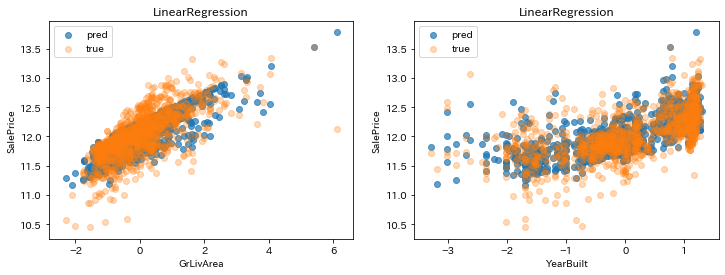

In [21]:
drawing_graph(tr_x, tr_y, lr,'LinearRegression')

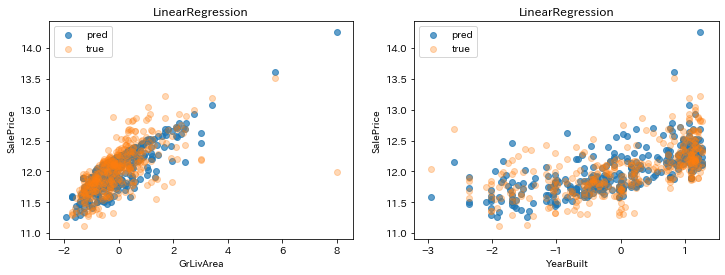

In [22]:
drawing_graph(va_x, va_y, lr,'LinearRegression')

# 【問題3】手法の比較

## SVM

In [23]:
svr = SVR()

In [24]:
svr_score = evaluation(tr_x, tr_y, va_x, va_y, svr)
print('MSE:{}'.format(svr_score[0]))
print('MAE:{}'.format(svr_score[1]))
print('R**2:{}'.format(svr_score[2]))

MSE:2038996674.058922
MAE:26473.58329311439
R**2:0.691150806882621


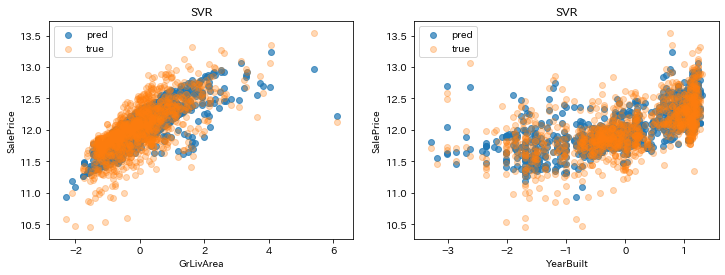

In [25]:
drawing_graph(tr_x, tr_y, svr,'SVR')

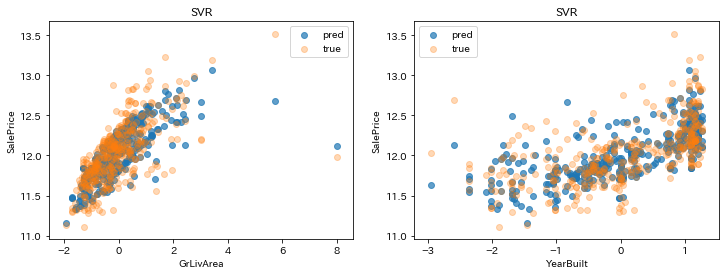

In [26]:
drawing_graph(va_x, va_y, svr,'SVR')

## 決定木

In [27]:
dtr = DecisionTreeRegressor(random_state=0)

In [28]:
dtr_score = evaluation(tr_x, tr_y, va_x, va_y, dtr)
print('MSE:{}'.format(dtr_score[0]))
print('MAE:{}'.format(dtr_score[1]))
print('R**2:{}'.format(dtr_score[2]))

MSE:2811589853.1163244
MAE:35594.28804886007
R**2:0.5741252212131398


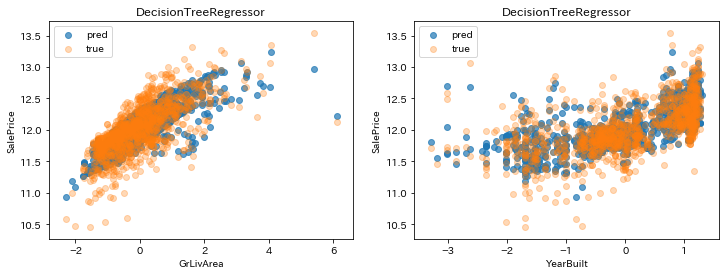

In [29]:
drawing_graph(tr_x, tr_y, svr,'DecisionTreeRegressor')

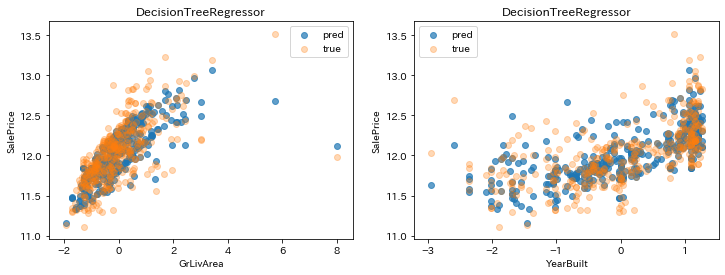

In [30]:
drawing_graph(va_x, va_y, svr,'DecisionTreeRegressor')

## ランダムフォレスト

In [31]:
rfr = RandomForestRegressor(random_state=0)

In [32]:
rfr_score = evaluation(tr_x, tr_y, va_x, va_y, rfr)
print('MSE:{}'.format(rfr_score[0]))
print('MAE:{}'.format(rfr_score[1]))
print('R**2:{}'.format(rfr_score[2]))

MSE:2099453172.262257
MAE:28948.90272728626
R**2:0.6819933909209592


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


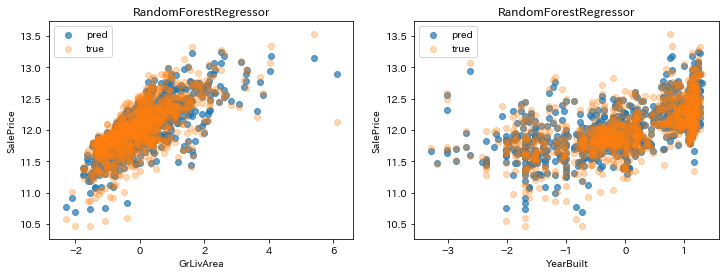

In [33]:
drawing_graph(tr_x, tr_y, rfr,'RandomForestRegressor')

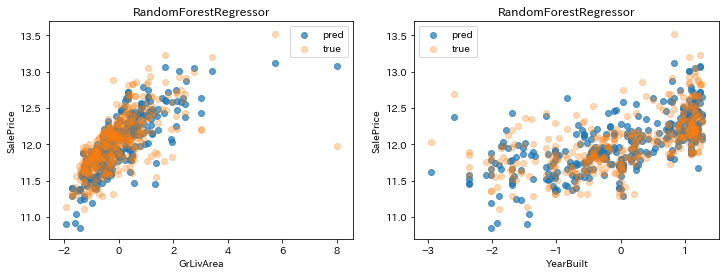

In [34]:
drawing_graph(va_x, va_y, rfr,'RandomForestRegressor')

In [35]:
df_score = pd.DataFrame([lr_score, svr_score, dtr_score, rfr_score])
df_score.columns =['MSE', 'MAE', 'R**2']
df_score.index = ['LinearRegression', 'SVM', 'DecisionTreeRegressor', 'RandomForestRegressor']
df_score

,MSE,MAE,R**2
LinearRegression,7.166626e+09,31452.932190,-0.085537
SVM,2.038997e+09,26473.583293,0.691151
DecisionTreeRegressor,2.811590e+09,35594.288049,0.574125
RandomForestRegressor,2.099453e+09,28948.902727,0.681993


## 考察

### SVMが最も誤差が小さかった。LinearRegressionの誤差が大きくなったのはグラフを見ると外れ値の影響が大きく出てしまったと考えられる。

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習

In [36]:
# 目的変数との相関係数が高い特徴量を抽出
high_correlation_list = list(data.corr()['SalePrice'].nlargest(11).index)

In [37]:
# 特徴量同士の相関係数を確認
data.corr().loc[high_correlation_list, high_correlation_list]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


In [38]:
# GrLivAreaとTotRmsAbvGrd、GarageCarsとGarageArea、TotalBsmtSFと1stFlrSFの相関係数が高いので
# TotRmsAbvGrd、GarageArea、1stFlrSFを除いた７つの特徴量を使用する。
high_correlation_list.remove('TotRmsAbvGrd')
high_correlation_list.remove('GarageArea')
high_correlation_list.remove('1stFlrSF')
high_correlation_list

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd']

In [39]:
train_x_features_7 = data[high_correlation_list].iloc[:, 1:]
train_y_features_7 = data[high_correlation_list].iloc[:,0]
train_y_features_7 = np.log(train_y_features_7)

In [40]:
train_x_features_7.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [41]:
train_x_features_7.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,1984.865753
std,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,20.645407
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000
25%,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,1967.000000
50%,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,1994.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,2004.000000
max,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,2010.000000


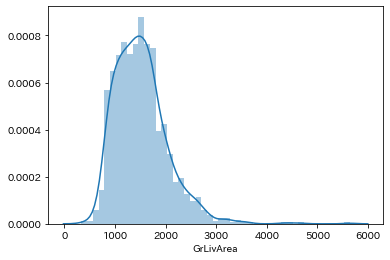

In [42]:
sns.distplot(train_x_features_7['GrLivArea'])

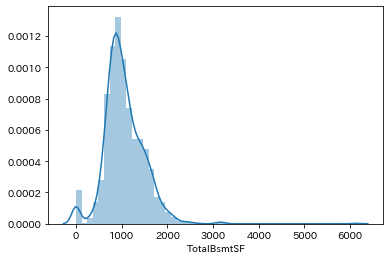

In [43]:
sns.distplot(train_x_features_7['TotalBsmtSF'])

In [44]:
# YearBuiltとYearRemodAddは2,010から引くことで築年数と改修からの経過年数とする。
train_x_features_7[['YearBuilt', 'YearRemodAdd']] = 2010 - train_x_features_7[['YearBuilt', 'YearRemodAdd']]

In [45]:
# 訓練データと検証データに分割する
tr_x_features_7, va_x_features_7, tr_y_features_7, va_y_features_7 = train_test_split(train_x_features_7, train_y_features_7, 
                                                                                      test_size=0.25, random_state=0)

In [46]:
# GrLivArea、TotalBsmtSF、YearBuilt、YearRemodAddを標準化する
scaler_features_7 = StandardScaler()
scaler_features_7.fit(tr_x_features_7[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']])
tr_x_features_7[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']] =  scaler_features_7.transform(tr_x_features_7
                                                                                                           [['GrLivArea', 
                                                                                                             'TotalBsmtSF', 
                                                                                                             'YearBuilt', 
                                                                                                             'YearRemodAdd']])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
va_x_features_7[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']] = scaler_features_7.transform(va_x_features_7
                                                                                                          [['GrLivArea', 
                                                                                                             'TotalBsmtSF', 
                                                                                                             'YearBuilt', 
                                                                                                             'YearRemodAdd']])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
def evaluation(tr_x, tr_y, va_x, va_y, model):
    """
    Accuracy, Precision, Recall, F値を計算する 

    Parameters
    ----------------
    tr_x : ndarray, shape(n_samples, 2)
          train_data 特徴量
    tr_y : ndarray, shape(n_samples,)
          train_data 価格
    va_x : ndarray, shape(n_samples, 2)
          validationdata 特徴量
    va_y : ndarray, shape(n_samples,)
          validation_data 価格     
    model : object
        学習したモデルのインスンタスを入れる
    """
    model.fit(tr_x, tr_y)
    y_pred = model.predict(va_x)
    mse = mean_squared_error(np.exp(va_y), np.exp(y_pred))
    mae = mean_absolute_error(np.exp(va_y), np.exp(y_pred))
    r2 = r2_score(np.exp(va_y), np.exp(y_pred))
    return mse, mae, r2

In [49]:
lr_features_7 = LinearRegression()

In [50]:
lr_features_7_score = evaluation(tr_x_features_7, tr_y_features_7, va_x_features_7, va_y_features_7, lr_features_7)
print('MSE:{}'.format(lr_features_7_score[0]))
print('MAE:{}'.format(lr_features_7_score[1]))
print('R**2:{}'.format(lr_features_7_score[2]))

MSE:11648682645.385653
MAE:23572.749796085605
R**2:-0.7644394822606808


In [51]:
svr_features_7 = SVR()

In [52]:
svr_features_7_score = evaluation(tr_x_features_7, tr_y_features_7, va_x_features_7, va_y_features_7, svr_features_7)
print('MSE:{}'.format(svr_features_7_score[0]))
print('MAE:{}'.format(svr_features_7_score[1]))
print('R**2:{}'.format(svr_features_7_score[2]))

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MSE:1074970005.8447704
MAE:19085.064740029353
R**2:0.8371730453735171


In [53]:
dtr_features_7 = DecisionTreeRegressor(random_state=0)

In [54]:
dtr_features_7_score = evaluation(tr_x_features_7, tr_y_features_7, va_x_features_7, va_y_features_7, dtr_features_7)
print('MSE:{}'.format(dtr_features_7_score[0]))
print('MAE:{}'.format(dtr_features_7_score[1]))
print('R**2:{}'.format(dtr_features_7_score[2]))

MSE:1947491563.4882674
MAE:26880.162628490794
R**2:0.7050111922012517


In [55]:
rfr_features_7 = RandomForestRegressor(random_state=0)

In [56]:
rfr_features_7_score = evaluation(tr_x_features_7, tr_y_features_7, va_x_features_7, va_y_features_7, rfr_features_7)
print('MSE:{}'.format(rfr_features_7_score[0]))
print('MAE:{}'.format(rfr_features_7_score[1]))
print('R**2:{}'.format(rfr_features_7_score[2]))

MSE:1266949307.7177222
MAE:20846.537254029437
R**2:0.8080937176663914


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
df_features_7_score = pd.DataFrame([lr_features_7_score, svr_features_7_score, dtr_features_7_score, rfr_features_7_score])
df_features_7_score.columns =['MSE', 'MAE', 'R**2']
df_features_7_score.index = ['LinearRegression', 'SVM', 'DecisionTreeRegressor', 'RandomForestRegressor']


In [58]:
print(df_score)
print(df_features_7_score)

                                MSE           MAE      R**2
LinearRegression       7.166626e+09  31452.932190 -0.085537
SVM                    2.038997e+09  26473.583293  0.691151
DecisionTreeRegressor  2.811590e+09  35594.288049  0.574125
RandomForestRegressor  2.099453e+09  28948.902727  0.681993
                                MSE           MAE      R**2
LinearRegression       1.164868e+10  23572.749796 -0.764439
SVM                    1.074970e+09  19085.064740  0.837173
DecisionTreeRegressor  1.947492e+09  26880.162628  0.705011
RandomForestRegressor  1.266949e+09  20846.537254  0.808094


## 考察

### 特徴量を増やすことで、LinearRegression以外のスコアを改善することができた。アルゴリズムが異なることで、同じ特徴量を使っていても、大きな差が生じることを学んだ。今後は複数のアルゴリズムで分析し、比較しながらデータ分析を進めていきたい。また、今回はカテゴリー変数をすべて落としてしまったので、カテゴリ変数も考慮した分析をする必要がある。